In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv") #importing dataset

In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.shape

(7043, 21)

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

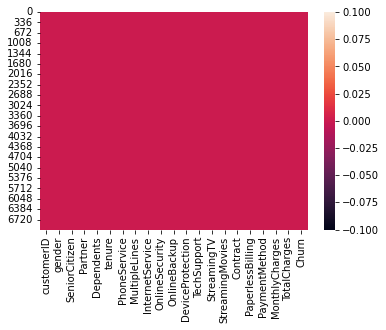

In [9]:
# heatmap to see null values:

import seaborn as sns

sns.heatmap(df.isnull())

#### * We observe that there are no null values present :

In [10]:
# Checking the datatype:

df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
df.TotalCharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
5         820.5
6        1949.4
7         301.9
8       3046.05
9       3487.95
10       587.45
11        326.8
12       5681.1
13       5036.3
14      2686.05
15      7895.15
16      1022.95
17      7382.25
18       528.35
19       1862.9
20        39.65
21       202.25
22        20.15
23       3505.1
24       2970.3
25       1530.6
26      4749.15
27         30.2
28      6369.45
29       1093.1
30      6766.95
31       181.65
32      1874.45
33         20.2
34        45.25
35       7251.7
36        316.9
37       3548.3
38      3549.25
39       1105.4
40        475.7
41      4872.35
42       418.25
43      4861.45
44       981.45
45       3906.7
46           97
47       144.15
48       4217.8
49       4254.1
50      3838.75
51       1426.4
52      1752.65
53        633.3
54      4456.35
55      1752.55
56       6311.2
57      7076.35
58        894.3
59       7853.7
60       4707.1
61       5450.7
62      

In [12]:
df.TotalCharges.nunique()

6531

In [13]:
df.TotalCharges.unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

#### * Since many values are present in the TotalCharges and float values are present in this column hence it is not a object column and we need to convert it into float/integer

In [14]:
# Checking missing or wide space in the column which might be the reason it is object data type.

In [15]:
df.loc[df['TotalCharges']== " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


#### * So wide spaces are present in the dataset and we shall deal with the same

In [16]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)

In [17]:
# Check weather it has been removed or not

In [18]:
df.loc[df['TotalCharges']== " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [19]:
# Checking the null values again:

df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [20]:
# So 11 empty values have been filled with nan

#### * Converting the TotalCharges column from object to float dtype

In [21]:
df.TotalCharges = df.TotalCharges.astype(float)

In [22]:
# checking the datatype now of TotalCharges:

df.TotalCharges.dtype

dtype('float64')

### Handling the missing values :

In [23]:
df.dropna(inplace = True)

In [24]:
df.TotalCharges.isnull().sum()

0

In [25]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [26]:
# Droping the unnecesary column 'customerID' :

df.drop(columns = ['customerID'], inplace = True)

In [27]:
# Collecting the columns in cat where the columns dtype is 'object' :

cat=[]
for x in df:
    if df[x].dtypes== "object":
        cat.append(x)

cat

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

### Data Visualization

#### * Univariate Analysis

In [28]:
#lets make a function for countplot
def countplot(a):
    plt.figure(figsize=[17,5])
    sns.countplot(x=a,data=df)
    plt.show()
    print("From the above plot we observe : \n",
           df[a].value_counts())

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

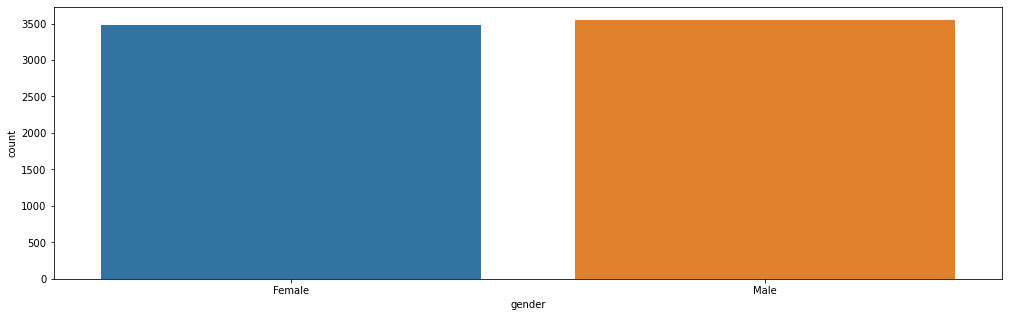

From the above plot we observe : 
 Male      3549
Female    3483
Name: gender, dtype: int64


In [30]:
countplot('gender')

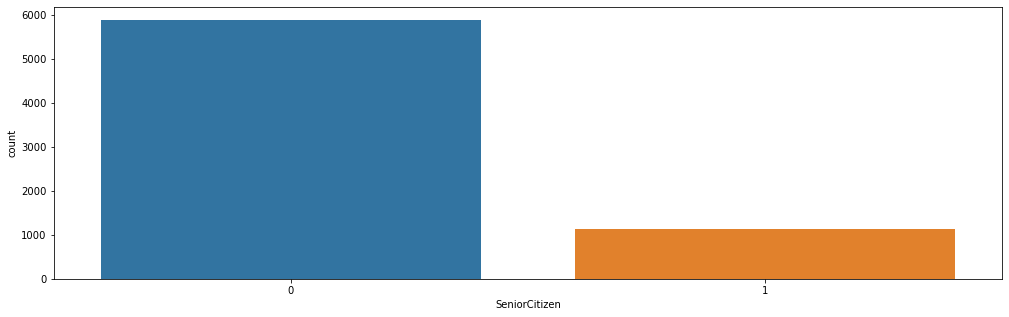

From the above plot we observe : 
 0    5890
1    1142
Name: SeniorCitizen, dtype: int64


In [31]:
countplot('SeniorCitizen')

#### * From the above we conclude that Senior Citizen are 1142 and number of Younger customers is 5890

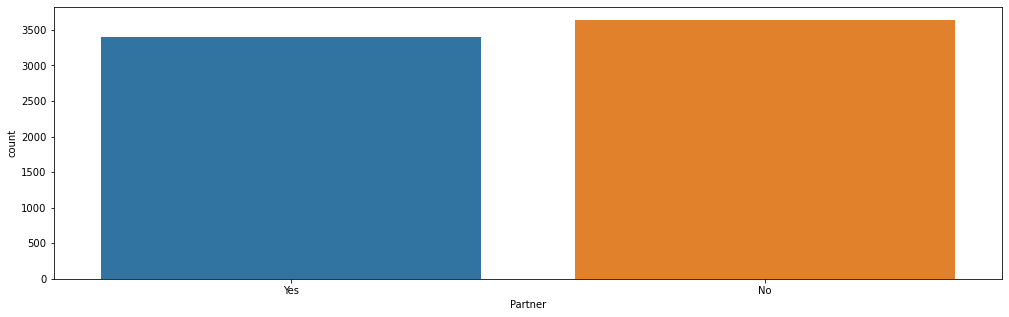

From the above plot we observe : 
 No     3639
Yes    3393
Name: Partner, dtype: int64


In [32]:
countplot('Partner')

#### * From the above We conclude that married are 3393 and single are 3639

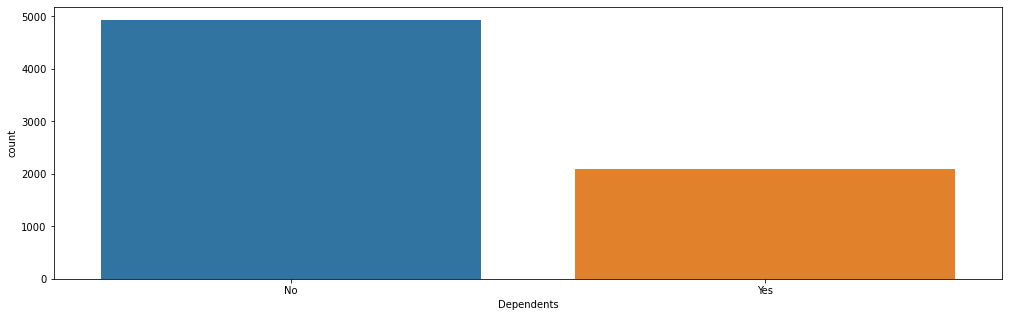

From the above plot we observe : 
 No     4933
Yes    2099
Name: Dependents, dtype: int64


In [33]:
countplot('Dependents')

#### * From the above the number of independent customers is 4933 and dependent customers is 2099

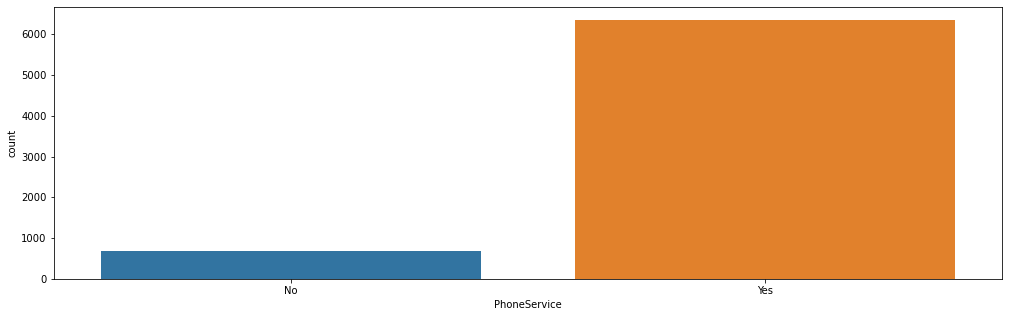

From the above plot we observe : 
 Yes    6352
No      680
Name: PhoneService, dtype: int64


In [34]:
countplot('PhoneService')

#### * Customers using phone services is 6352 and the number of customers not using phone services are 680

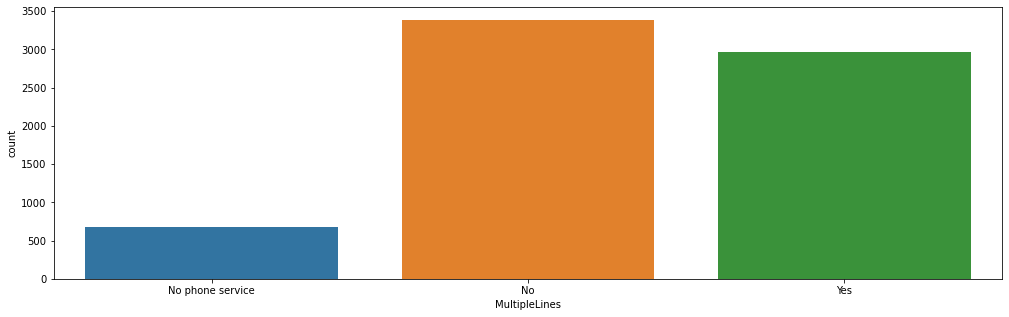

From the above plot we observe : 
 No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64


In [35]:
countplot('MultipleLines')

#### * So the number of customers using multiplelines are 2967 and not using multiple lines are 3385, 680 customers have no phone services 

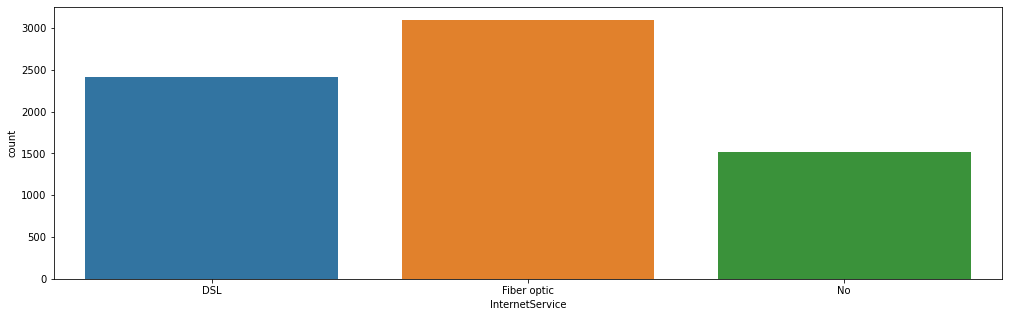

From the above plot we observe : 
 Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64


In [36]:
countplot('InternetService')

#### * 3096 use Fiber optic, 2416 use DSL type of internet service and 1520 do not use internet services.

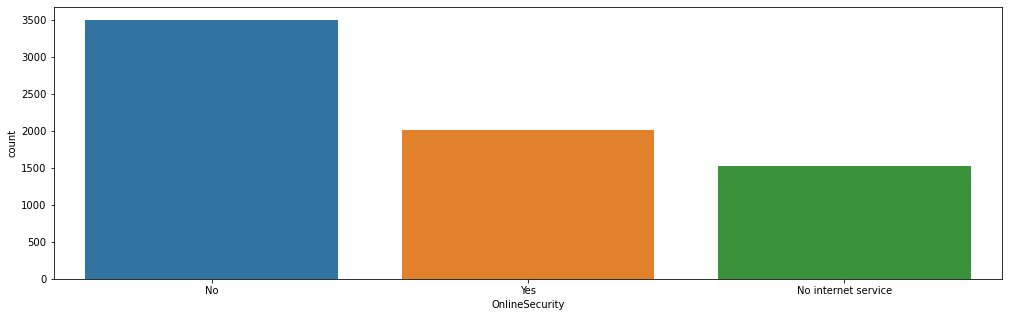

From the above plot we observe : 
 No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64


In [37]:
countplot('OnlineSecurity')

#### * 2015 customers use online security and 3497 do not while 1520 do not use any internet service.

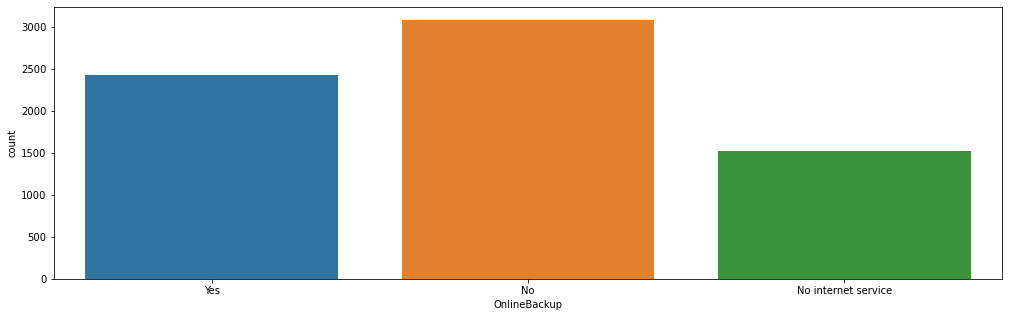

From the above plot we observe : 
 No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64


In [38]:
countplot('OnlineBackup')

#### * 2425 customers are having online backup and 3087 do not do online back while 1520 do not use internet services

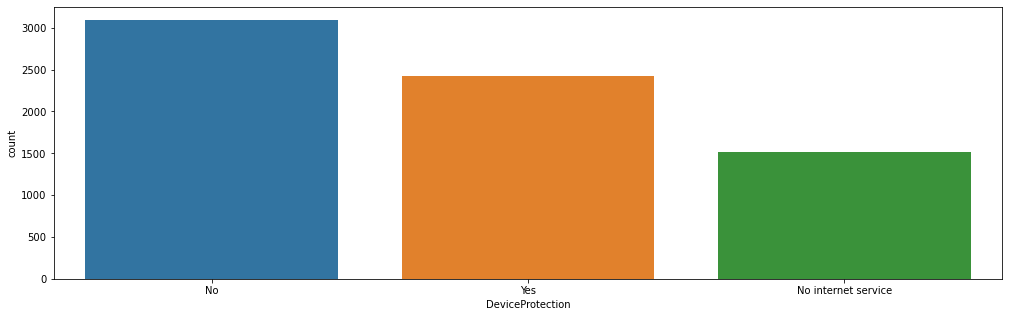

From the above plot we observe : 
 No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64


In [39]:
countplot('DeviceProtection')

#### * 2418 customer use Device Protection services and 3094 do not use that while 1520 do not use internet services.

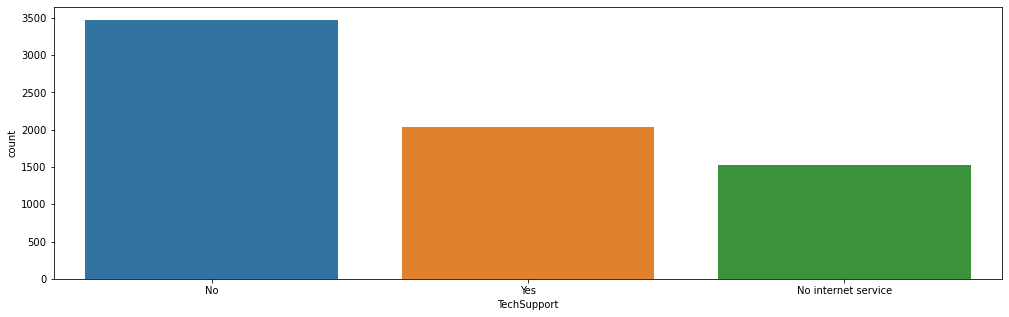

From the above plot we observe : 
 No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64


In [40]:
countplot("TechSupport")

#### * Here 2040 take Tech Support and 3472 do not while here also 1520 do not use internet services

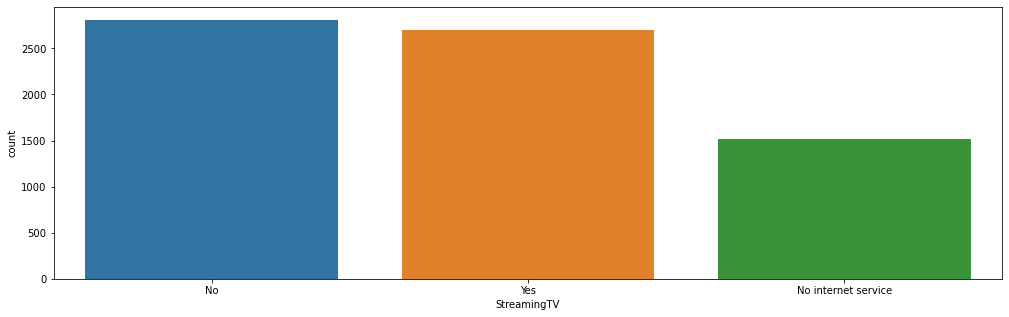

From the above plot we observe : 
 No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64


In [41]:
countplot('StreamingTV')

#### * 2703 customers are streaming movies and 2809 do not stream movies while 1520 do not have internet services.

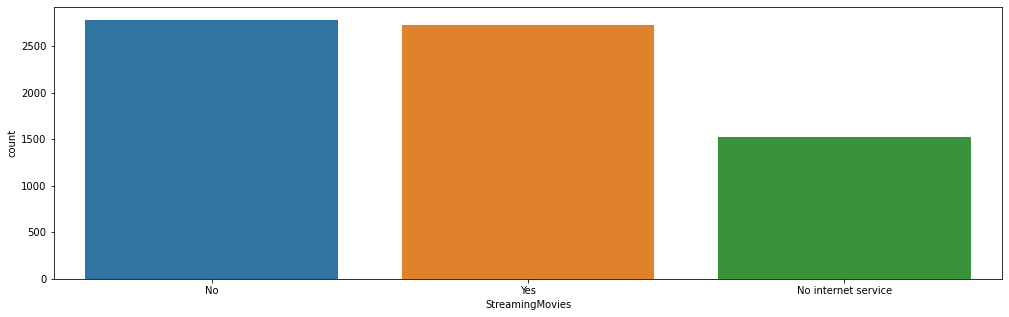

From the above plot we observe : 
 No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64


In [42]:
countplot('StreamingMovies')

#### * 2731 customers are streaming movies and 2781 do not while 1520 do not use internet service

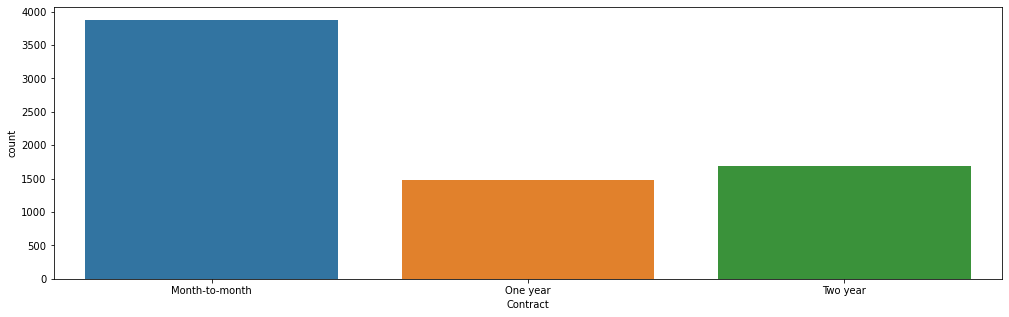

From the above plot we observe : 
 Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64


In [43]:
countplot('Contract')

#### * 3875 customers recharge on monthly basis and 1472 recharge on every basis while 1685 recharge every two year

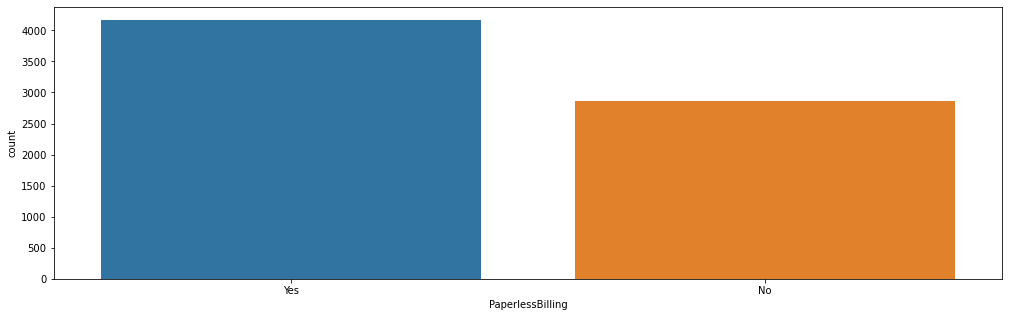

From the above plot we observe : 
 Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64


In [44]:
countplot('PaperlessBilling')

#### * 4168 customers are opting for paperless bill while 2864 are using paper for billing.

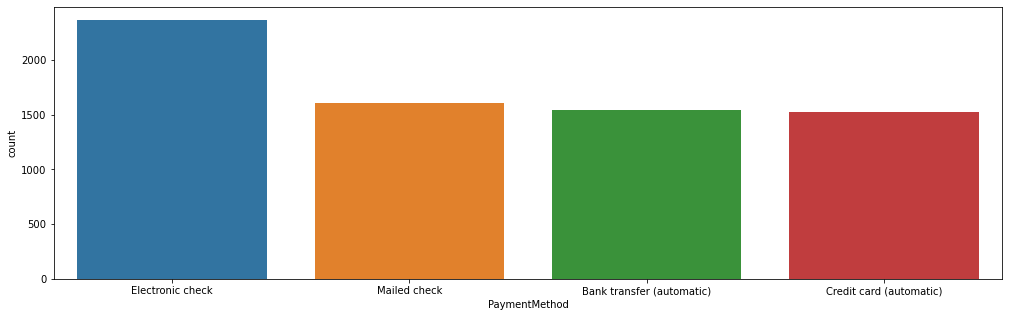

From the above plot we observe : 
 Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64


In [45]:
countplot('PaymentMethod')

#### * 2356 customer use Electronic check, 1604 Mailed check, 1542 use bank transfer and 1521 use Credit card for payments.

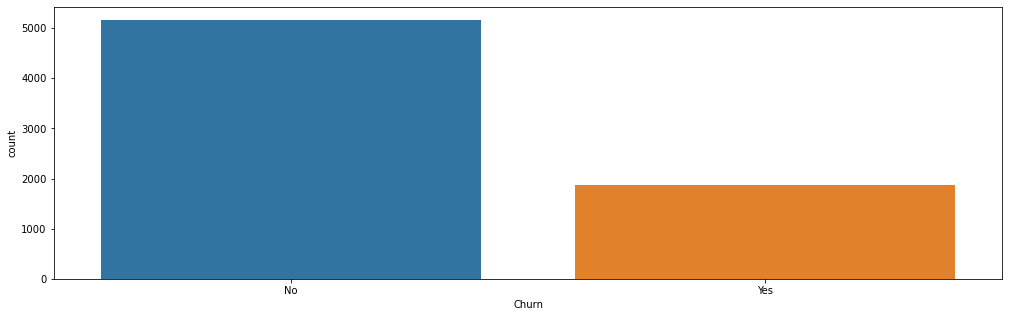

From the above plot we observe : 
 No     5163
Yes    1869
Name: Churn, dtype: int64


In [46]:
countplot('Churn')

# Bivariate analysis :

In [47]:
def catplot(a,b):
    plt.figure(figsize=[12,5])
    sns.catplot(x=a, y=b, data=df)
    plt.show()

<Figure size 864x360 with 0 Axes>

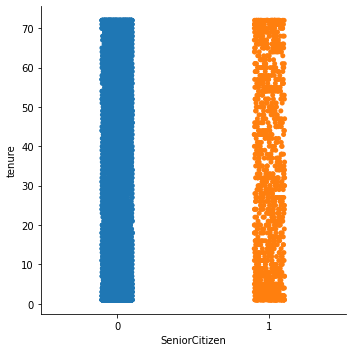

In [48]:
catplot('SeniorCitizen', 'tenure')

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

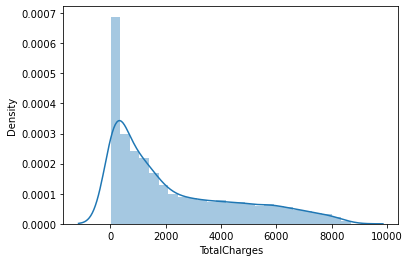

In [49]:
# Checking the distribution of the continuous columns:
import warnings
warnings.filterwarnings('ignore')

sns.distplot(df['TotalCharges'], kde = True)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

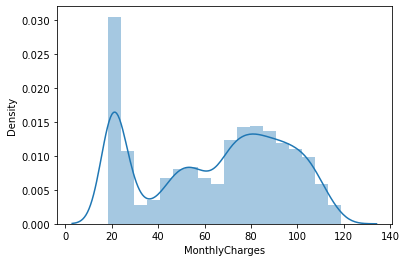

In [50]:
sns.distplot(df['MonthlyCharges'], kde = True)

### Encoding the object datatype columns :

In [52]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

In [53]:
for i in df.columns:
    if df[i].dtypes=="object" :
        df[i] = oe.fit_transform(df[i].values.reshape(-1,1))

In [54]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0


In [55]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.940557,0.872582,0.789249,0.905859,0.903868,0.796359,0.984926,0.992890,0.688567,0.592719,1.573237,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.948627,0.737271,0.859962,0.880394,0.880178,0.861674,0.885285,0.885385,0.832934,0.491363,1.067504,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,401.450000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


## Plotting Heatmap to check the correlation :

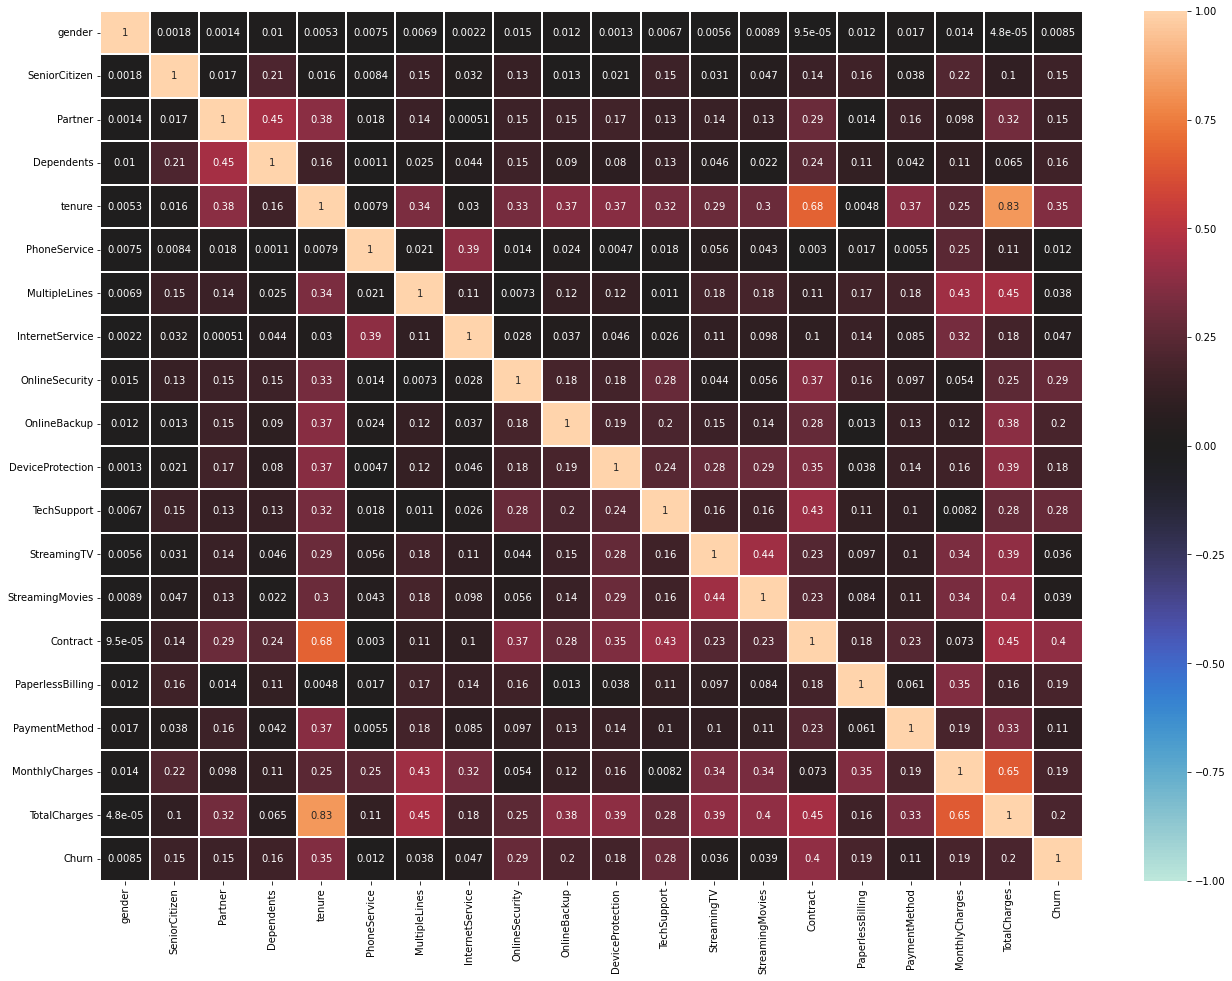

In [56]:
df_corr=df.corr().abs()
plt.figure(figsize=(22,16))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,center=0,fmt=".2g",linewidths=.2)
plt.show()

<AxesSubplot:title={'center':'Correlation with Churn'}>

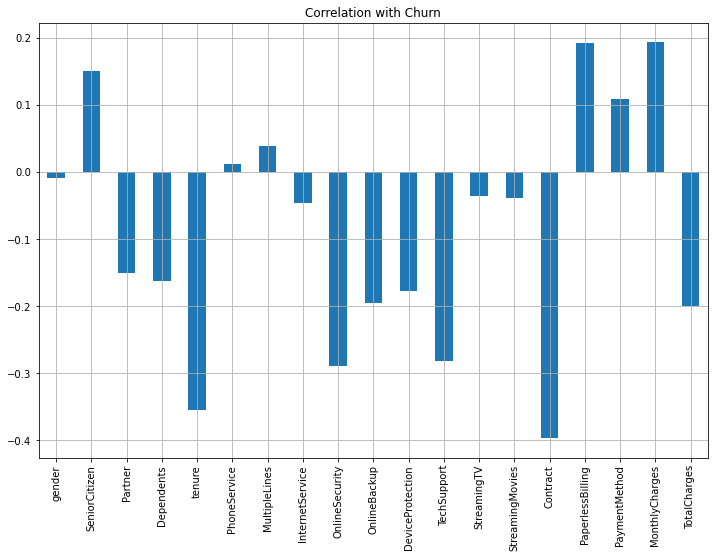

In [57]:
df.drop(columns = ['Churn'], axis = 1).corrwith(df.Churn).plot(kind = 'bar', grid = True, figsize = (12,8),
                                                     title = "Correlation with Churn")

In [103]:
df.skew()

gender             -0.018776
SeniorCitizen       1.831103
Partner             0.070024
Dependents          0.880908
tenure              0.237731
PhoneService       -2.729727
MultipleLines       0.118623
InternetService     0.205704
OnlineSecurity      0.418619
OnlineBackup        0.184089
DeviceProtection    0.188013
TechSupport         0.403966
StreamingTV         0.029366
StreamingMovies     0.013851
Contract            0.635149
PaperlessBilling   -0.377503
PaymentMethod      -0.169388
MonthlyCharges     -0.222103
TotalCharges        0.961642
Churn               1.060622
dtype: float64

In [58]:
# for skewness removal 
from sklearn.preprocessing import PowerTransformer
scale=PowerTransformer()

In [59]:
a=["TotalCharges"]

In [61]:
df[a]=scale.fit_transform(df[a])

In [62]:
df.skew()

gender             -0.018776
SeniorCitizen       1.831103
Partner             0.070024
Dependents          0.880908
tenure              0.237731
PhoneService       -2.729727
MultipleLines       0.118623
InternetService     0.205704
OnlineSecurity      0.418619
OnlineBackup        0.184089
DeviceProtection    0.188013
TechSupport         0.403966
StreamingTV         0.029366
StreamingMovies     0.013851
Contract            0.635149
PaperlessBilling   -0.377503
PaymentMethod      -0.169388
MonthlyCharges     -0.222103
TotalCharges       -0.144643
Churn               1.060622
dtype: float64

### Outlier Detection :

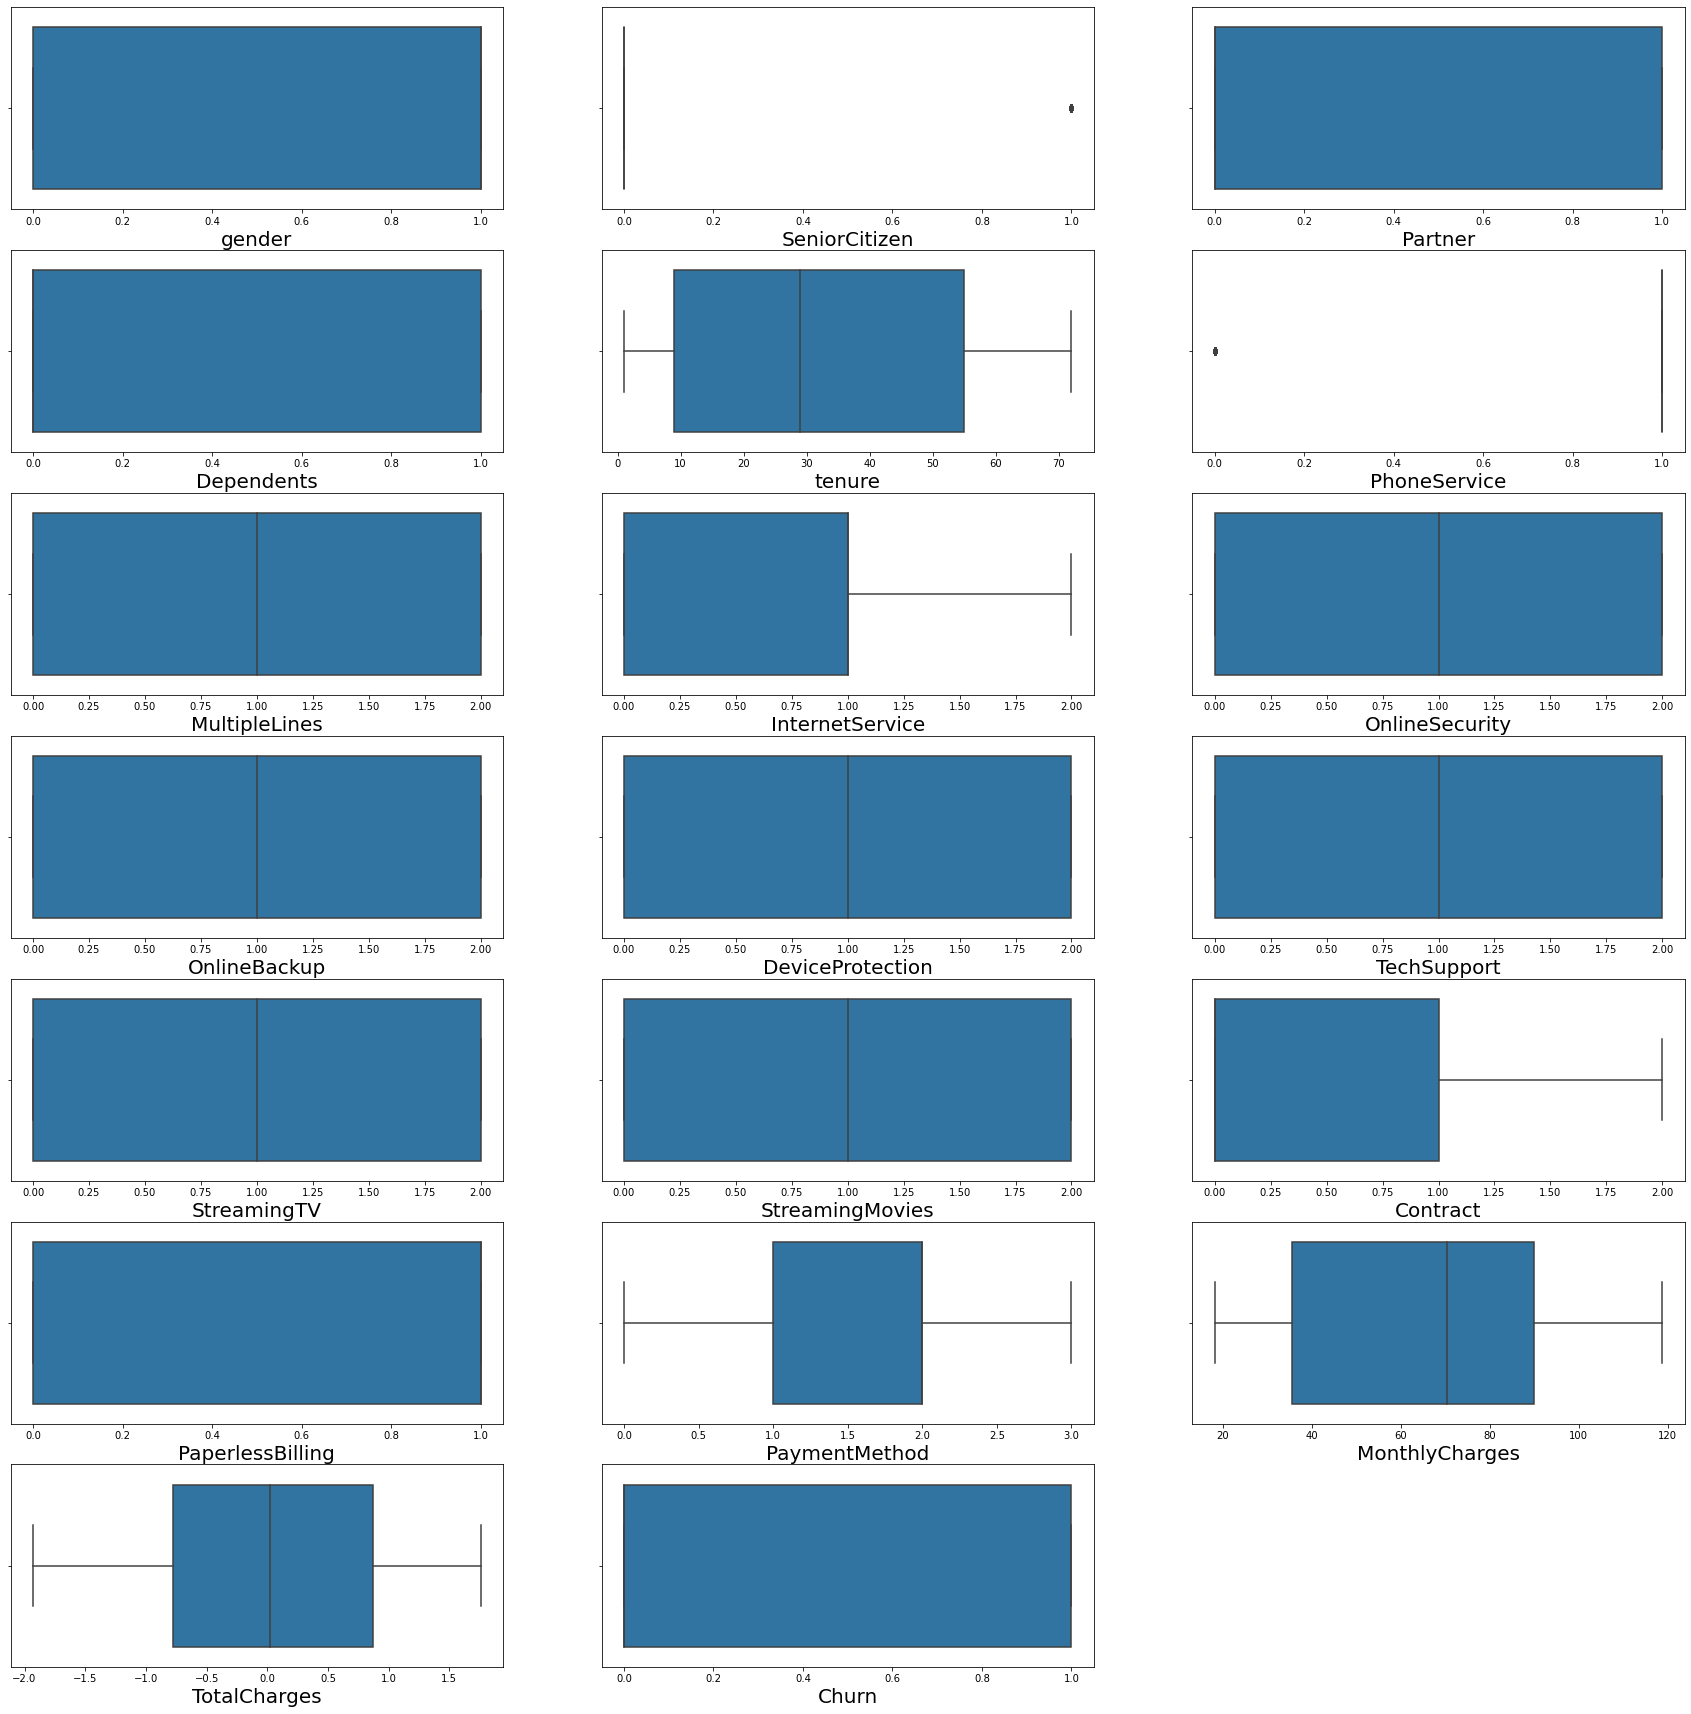

In [63]:
#using box plot to see outliers in the dataset: 

plt.figure(figsize=(30,35))
plotnumber = 1
for column in df:
    if plotnumber<=25:
        ax=plt.subplot(8,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

#### * We do not see any outliers using the boxplot :

### Outlier Removal using zscore :

In [64]:
from scipy.stats import zscore

z=np.abs(zscore(df))
threshold = 3
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  494,  497,  543,
         568,  595,  609,  615,  619,  633,  659,  666,  668,  673,  676,
         687,  715,  717,  734,  763,  774,  782,  788,  792,  811,  827,
         841,  845,  857,  864,  871,  873,  875,  882,  891,  915,  932,
         938,  940,  957,  970, 1008, 1015, 1034, 1047, 1048, 1050, 1069,
        1106, 1115, 1118, 1140, 1142, 1146, 1157, 1165, 1178, 1200, 1217,
        1221, 1238, 1251, 1253, 1267, 1274, 1294, 1307, 1322, 1327, 1329,
        1330, 1344, 1347, 1360, 1374, 1397, 1402, 1411, 1447, 1474, 1475,
        1476, 1495, 1501, 1508, 1514, 1555, 1557, 1576, 1579, 1609, 1615,
        1629, 1632, 1647, 1684, 1687, 

In [65]:
df_new = df[(z<3).all(axis=1)]
df_new.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,0.254257,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,-1.386091,1.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,-1.248808,1.0
5,0.0,0,0.0,0.0,8,1.0,2.0,1.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0,99.65,-0.352726,1.0
6,1.0,0,0.0,1.0,22,1.0,2.0,1.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,89.10,0.279557,0.0
8,0.0,0,1.0,0.0,28,1.0,2.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,0.0,1.0,2.0,104.80,0.664188,1.0
9,1.0,0,0.0,1.0,62,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,56.15,0.789814,0.0
10,1.0,0,1.0,1.0,13,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,49.95,-0.561970,0.0
11,1.0,0,0.0,0.0,16,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0,18.95,-0.888783,0.0
12,1.0,0,1.0,0.0,58,1.0,2.0,1.0,0.0,0.0,2.0,0.0,2.0,2.0,1.0,0.0,1.0,100.35,1.279699,0.0


#### * We will not remove any outliers as there are no outliers in the continuous columns:

### Splitting the dataset into features and target :

In [66]:
x = df.drop(columns = ['Churn'], axis = 1)
y = df[['Churn']]

In [67]:
y.value_counts()

Churn
0.0      5163
1.0      1869
dtype: int64

In [68]:
#Data Balancing
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto')
X_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()

Churn
0.0      5163
1.0      5163
dtype: int64

In [69]:
# Now we are going to check the shape of x and y:

print(X_sm.shape,y_sm.shape)

(10326, 19) (10326, 1)


In [70]:
x.dtypes

gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [71]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve,auc,plot_roc_curve
from sklearn.linear_model import LogisticRegression,Ridge
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

### Scaling the dataset using minmaxscaler

In [72]:
mn=MinMaxScaler()

X_=mn.fit_transform(X_sm)

x = pd.DataFrame(X_,columns=X_sm.columns)

In [73]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,0.0,0.000000,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423,0.032379
1,1.0,0.0,0.0,0.0,0.464789,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075,0.592184
2,1.0,0.0,0.0,0.0,0.014085,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,0.147354
3,1.0,0.0,0.0,0.0,0.619718,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.239303,0.586480
4,0.0,0.0,0.0,0.0,0.014085,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891,0.184582


In [74]:
y = y_sm

In [75]:
x.shape, y.shape

((10326, 19), (10326, 1))

### Since our Target variable is churn which is object dtype we will use Classification models : 

### Finding the best Random State :

In [76]:
lr = LogisticRegression()

for i in range(0,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size =0.20, random_state =i)
    lr.fit(X_train, Y_train)
    pred_train = lr.predict(X_train)
    pred_test = lr.predict(X_test)
    if round(accuracy_score(Y_train, pred_train)*100,1)==round(accuracy_score(Y_test, pred_test)*100,1):
        print("At random state", i, "The model performs very well")
        print("At random state :- ", i)
        print("Training accuracy_score is :- ", round(accuracy_score(Y_train, pred_train)*100,1))
        print("Testing accuracy_score is :- ", round(accuracy_score(Y_test, pred_test)*100,1), '\n\n')

At random state 24 The model performs very well
At random state :-  24
Training accuracy_score is :-  77.3
Testing accuracy_score is :-  77.3 


At random state 41 The model performs very well
At random state :-  41
Training accuracy_score is :-  77.2
Testing accuracy_score is :-  77.2 


At random state 48 The model performs very well
At random state :-  48
Training accuracy_score is :-  77.4
Testing accuracy_score is :-  77.4 


At random state 64 The model performs very well
At random state :-  64
Training accuracy_score is :-  77.3
Testing accuracy_score is :-  77.3 


At random state 73 The model performs very well
At random state :-  73
Training accuracy_score is :-  77.3
Testing accuracy_score is :-  77.3 


At random state 96 The model performs very well
At random state :-  96
Training accuracy_score is :-  77.3
Testing accuracy_score is :-  77.3 


At random state 106 The model performs very well
At random state :-  106
Training accuracy_score is :-  77.3
Testing accuracy_scor

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.20, random_state = 230)

In [78]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((8260, 19), (2066, 19), (8260, 1), (2066, 1))

In [79]:
# Defining a function for model selection :

def func(instance, X_train, Y_train, X_test, Y_test):
    instances = instance.fit(X_train,Y_train)
    train_pred = instances.predict(X_train)
    test_pred = instances.predict(X_test)
    print('training confucion matrix',confusion_matrix(Y_train,train_pred))
    print('testing confucion matrix',confusion_matrix(Y_test,test_pred))
    print('test ',classification_report(Y_test, test_pred))
    print('training ',classification_report(Y_train, train_pred))
    print('cross_val_score',cross_val_score(instances,x, y))
    print('cross_val_score Mean',cross_val_score(instances,x, y).mean())

### KNeighborsClassifier

In [80]:
model1 = KNeighborsClassifier()
func(model1, X_train,Y_train,X_test,Y_test)

training confucion matrix [[3255  901]
 [ 322 3782]]
testing confucion matrix [[697 310]
 [141 918]]
test                precision    recall  f1-score   support

         0.0       0.83      0.69      0.76      1007
         1.0       0.75      0.87      0.80      1059

    accuracy                           0.78      2066
   macro avg       0.79      0.78      0.78      2066
weighted avg       0.79      0.78      0.78      2066

training                precision    recall  f1-score   support

         0.0       0.91      0.78      0.84      4156
         1.0       0.81      0.92      0.86      4104

    accuracy                           0.85      8260
   macro avg       0.86      0.85      0.85      8260
weighted avg       0.86      0.85      0.85      8260

cross_val_score [0.7463698  0.74915254 0.8062954  0.79467312 0.81065375]
cross_val_score Mean 0.7814289230221105


### DecisionTreeClassifier 

In [81]:
model2 = DecisionTreeClassifier()
func(model2, X_train,Y_train,X_test,Y_test)

training confucion matrix [[4154    2]
 [   8 4096]]
testing confucion matrix [[827 180]
 [185 874]]
test                precision    recall  f1-score   support

         0.0       0.82      0.82      0.82      1007
         1.0       0.83      0.83      0.83      1059

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066

training                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4156
         1.0       1.00      1.00      1.00      4104

    accuracy                           1.00      8260
   macro avg       1.00      1.00      1.00      8260
weighted avg       1.00      1.00      1.00      8260

cross_val_score [0.69312682 0.73753027 0.86150121 0.86973366 0.87651332]
cross_val_score Mean 0.8092302679845955


### LogisticRegression

In [82]:
model3 = LogisticRegression()
func(model3, X_train,Y_train,X_test,Y_test)

training confucion matrix [[3102 1054]
 [ 811 3293]]
testing confucion matrix [[759 248]
 [219 840]]
test                precision    recall  f1-score   support

         0.0       0.78      0.75      0.76      1007
         1.0       0.77      0.79      0.78      1059

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066

training                precision    recall  f1-score   support

         0.0       0.79      0.75      0.77      4156
         1.0       0.76      0.80      0.78      4104

    accuracy                           0.77      8260
   macro avg       0.78      0.77      0.77      8260
weighted avg       0.78      0.77      0.77      8260

cross_val_score [0.76573088 0.75690073 0.768523   0.78062954 0.78256659]
cross_val_score Mean 0.7708701471301763


### Bagging Classifier 

In [83]:
model4 = BaggingClassifier()
func(model4, X_train,Y_train,X_test,Y_test)

training confucion matrix [[4131   25]
 [  77 4027]]
testing confucion matrix [[889 118]
 [206 853]]
test                precision    recall  f1-score   support

         0.0       0.81      0.88      0.85      1007
         1.0       0.88      0.81      0.84      1059

    accuracy                           0.84      2066
   macro avg       0.85      0.84      0.84      2066
weighted avg       0.85      0.84      0.84      2066

training                precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      4156
         1.0       0.99      0.98      0.99      4104

    accuracy                           0.99      8260
   macro avg       0.99      0.99      0.99      8260
weighted avg       0.99      0.99      0.99      8260

cross_val_score [0.70571152 0.7472155  0.90653753 0.91719128 0.91380145]
cross_val_score Mean 0.8367350555166198


### SVC

In [84]:
model5 = SVC()
func(model5, X_train,Y_train,X_test,Y_test)

training confucion matrix [[3544  612]
 [ 617 3487]]
testing confucion matrix [[842 165]
 [174 885]]
test                precision    recall  f1-score   support

         0.0       0.83      0.84      0.83      1007
         1.0       0.84      0.84      0.84      1059

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066

training                precision    recall  f1-score   support

         0.0       0.85      0.85      0.85      4156
         1.0       0.85      0.85      0.85      4104

    accuracy                           0.85      8260
   macro avg       0.85      0.85      0.85      8260
weighted avg       0.85      0.85      0.85      8260

cross_val_score [0.7463698  0.75738499 0.8566586  0.86924939 0.86682809]
cross_val_score Mean 0.8192981724167836


### ExtraTreeClassifier 

In [85]:
from sklearn.ensemble import ExtraTreesClassifier

model6 = ExtraTreesClassifier()
func(model6, X_train,Y_train,X_test,Y_test)

training confucion matrix [[4154    2]
 [   8 4096]]
testing confucion matrix [[893 114]
 [152 907]]
test                precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      1007
         1.0       0.89      0.86      0.87      1059

    accuracy                           0.87      2066
   macro avg       0.87      0.87      0.87      2066
weighted avg       0.87      0.87      0.87      2066

training                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4156
         1.0       1.00      1.00      1.00      4104

    accuracy                           1.00      8260
   macro avg       1.00      1.00      1.00      8260
weighted avg       1.00      1.00      1.00      8260

cross_val_score [0.74782188 0.77772397 0.91089588 0.92542373 0.92009685]
cross_val_score Mean 0.8566827383979992


### GaussianNB 

In [86]:
from sklearn.naive_bayes import GaussianNB

model7 = GaussianNB()
func(model7, X_train,Y_train,X_test,Y_test)

training confucion matrix [[3020 1136]
 [ 811 3293]]
testing confucion matrix [[746 261]
 [213 846]]
test                precision    recall  f1-score   support

         0.0       0.78      0.74      0.76      1007
         1.0       0.76      0.80      0.78      1059

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066

training                precision    recall  f1-score   support

         0.0       0.79      0.73      0.76      4156
         1.0       0.74      0.80      0.77      4104

    accuracy                           0.76      8260
   macro avg       0.77      0.76      0.76      8260
weighted avg       0.77      0.76      0.76      8260

cross_val_score [0.75314618 0.75399516 0.76707022 0.77723971 0.76610169]
cross_val_score Mean 0.7635105911693766


### XGBClassifier 

In [87]:
from xgboost import XGBClassifier

model8 = XGBClassifier()
func(model8, X_train,Y_train,X_test,Y_test)

training confucion matrix [[3950  206]
 [ 231 3873]]
testing confucion matrix [[879 128]
 [157 902]]
test                precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      1007
         1.0       0.88      0.85      0.86      1059

    accuracy                           0.86      2066
   macro avg       0.86      0.86      0.86      2066
weighted avg       0.86      0.86      0.86      2066

training                precision    recall  f1-score   support

         0.0       0.94      0.95      0.95      4156
         1.0       0.95      0.94      0.95      4104

    accuracy                           0.95      8260
   macro avg       0.95      0.95      0.95      8260
weighted avg       0.95      0.95      0.95      8260

cross_val_score [0.69264279 0.75302663 0.90460048 0.91476998 0.92687651]
cross_val_score Mean 0.8383832791488623


### RandomForestClassifier 

In [90]:
model9 = RandomForestClassifier()
func(model9, X_train,Y_train,X_test,Y_test)

training confucion matrix [[4148    8]
 [   2 4102]]
testing confucion matrix [[881 126]
 [156 903]]
test                precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      1007
         1.0       0.88      0.85      0.86      1059

    accuracy                           0.86      2066
   macro avg       0.86      0.86      0.86      2066
weighted avg       0.86      0.86      0.86      2066

training                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4156
         1.0       1.00      1.00      1.00      4104

    accuracy                           1.00      8260
   macro avg       1.00      1.00      1.00      8260
weighted avg       1.00      1.00      1.00      8260

cross_val_score [0.72120039 0.76271186 0.91186441 0.92445521 0.92736077]
cross_val_score Mean 0.8503902922679893


### Plotting the ROC-AUC curve for better insight : 

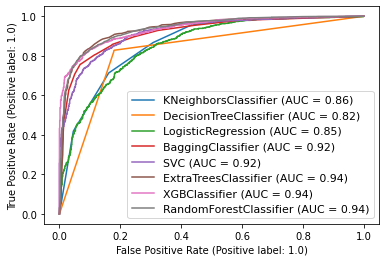

In [91]:
disp = plot_roc_curve(model1, X_test, Y_test)
plot_roc_curve(model2, X_test, Y_test, ax = disp.ax_)
plot_roc_curve(model3, X_test, Y_test, ax = disp.ax_)
plot_roc_curve(model4, X_test, Y_test, ax = disp.ax_)
plot_roc_curve(model5, X_test, Y_test, ax = disp.ax_)
plot_roc_curve(model6, X_test, Y_test, ax = disp.ax_)
plot_roc_curve(model8, X_test, Y_test, ax = disp.ax_)
plot_roc_curve(model9, X_test, Y_test, ax = disp.ax_)
plt.legend(prop = {'size':11}, loc = 'lower right')
plt.show()

#### * From the above we observe that AUC of RandomForest & ExtraTreeClassifier are maximum, hence we consider them to be our best model and we shall now tune its hyperparameter to check if it gives better results.

### HyperParameter Tunning :

In [92]:
clf = RandomForestClassifier()

In [93]:
params = {'max_depth' : (4,8,12,16), 'min_samples_split':(4,8,12,16),'criterion':['gini', 'entropy'], 
          'n_estimators' : [5,25,100,125], 'max_features':['sqrt', 'log2']}

In [94]:
grd = GridSearchCV(clf, param_grid = params, n_jobs=-1)

grd.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': (4, 8, 12, 16),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': (4, 8, 12, 16),
                         'n_estimators': [5, 25, 100, 125]})

In [95]:
print("Best Parameters =" ,grd.best_params_)

Best Parameters = {'criterion': 'entropy', 'max_depth': 16, 'max_features': 'log2', 'min_samples_split': 8, 'n_estimators': 100}


In [134]:
rf_clf = RandomForestClassifier(max_depth = 16, min_samples_split = 8, 
                              criterion = 'entropy', n_estimators = 100, max_features = 'log2',random_state= 230)

In [135]:
model10 = rf_clf
func(model10, X_train,Y_train,X_test,Y_test)

training confucion matrix [[3889  267]
 [ 237 3867]]
testing confucion matrix [[870 137]
 [148 911]]
test                precision    recall  f1-score   support

         0.0       0.85      0.86      0.86      1007
         1.0       0.87      0.86      0.86      1059

    accuracy                           0.86      2066
   macro avg       0.86      0.86      0.86      2066
weighted avg       0.86      0.86      0.86      2066

training                precision    recall  f1-score   support

         0.0       0.94      0.94      0.94      4156
         1.0       0.94      0.94      0.94      4104

    accuracy                           0.94      8260
   macro avg       0.94      0.94      0.94      8260
weighted avg       0.94      0.94      0.94      8260

cross_val_score [0.72458858 0.76464891 0.9031477  0.91622276 0.91767554]
cross_val_score Mean 0.8452566984429094


#### * WE observe that our test accuracy has increased to 87% and our cv score is 84.8%

### Tunning ExtraTreeClassifier

In [122]:
clf1 = ExtraTreesClassifier()

In [123]:
params = {'max_depth' : (4,8,12,16), 'min_samples_split':(4,8,12,16),'criterion':['gini', 'entropy'], 
          'n_estimators' : [5,25,100,125], 'max_features':['sqrt', 'log2']}

In [125]:
grd1 = GridSearchCV(clf1, param_grid = params, n_jobs = -1)

grd1.fit(X_train, Y_train)

GridSearchCV(estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': (4, 8, 12, 16),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': (4, 8, 12, 16),
                         'n_estimators': [5, 25, 100, 125]})

In [126]:
print("Best Parameters =" ,grd1.best_params_)

Best Parameters = {'criterion': 'entropy', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 100}


In [136]:
xt_clf = ExtraTreesClassifier(max_depth = 16, min_samples_split = 4, 
                              criterion = 'entropy', n_estimators = 125, max_features = 'sqrt', random_state = 230)

In [137]:
model11 = xt_clf
func(model11, X_train,Y_train,X_test,Y_test)

training confucion matrix [[3809  347]
 [  95 4009]]
testing confucion matrix [[858 149]
 [127 932]]
test                precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      1007
         1.0       0.86      0.88      0.87      1059

    accuracy                           0.87      2066
   macro avg       0.87      0.87      0.87      2066
weighted avg       0.87      0.87      0.87      2066

training                precision    recall  f1-score   support

         0.0       0.98      0.92      0.95      4156
         1.0       0.92      0.98      0.95      4104

    accuracy                           0.95      8260
   macro avg       0.95      0.95      0.95      8260
weighted avg       0.95      0.95      0.95      8260

cross_val_score [0.76718296 0.78401937 0.89782082 0.9094431  0.90847458]
cross_val_score Mean 0.8533881662990561


#### * After HyperParameter tunning of the above to models we conclude that ExtraTreeClassifier is our best model.

### Saving the model 

In [138]:
# Saving the model using joblib :

import joblib

  
# Save the model as a pickle in a file

joblib.dump(xt_clf,'Churn.pkl')

['Churn.pkl']

In [139]:
#saving the predicted as csv

joblib.dump(xt_clf,'Churn.csv')

['Churn.csv']

In [141]:
#lets call the model and predict it:

x=joblib.load('Churn.csv')
x.predict(X_test)

array([0., 0., 1., ..., 0., 0., 1.])